<a href="https://colab.research.google.com/github/jennadof/logisticregressionProjects/blob/main/Knn_Nb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [51]:
data = pd.read_csv("/content/ortho_knnnb.csv")

In [52]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [53]:
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (310, 7)
Number of rows in the dataset: 310
Number of columns in the dataset: 7


In [54]:
print("Column Names:",data.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [55]:
data_corr = data.corr()
data_corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [56]:
#EXPLANATORY DATA ANALYSIS 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [57]:
# getting discriptive statistcs (Summary of the data)
data.describe()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


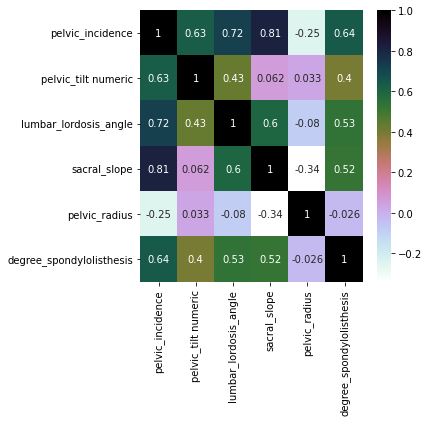

In [58]:
corr = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap ='cubehelix_r')
plt.show()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [60]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [61]:
data['symptom_class'] = data['class'].replace(('Abnormal','Normal'),(1,0))
data.drop(['class'],axis = 1, inplace=True)

In [62]:
#SECTION III: PREPARE DATA FOR TRAINING!
data['symptom_class'].value_counts()

1    210
0    100
Name: symptom_class, dtype: int64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   symptom_class             310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [64]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30,random_state = 1)

In [65]:
train_x = train.drop(['symptom_class'], axis = 1)
train_y = train['symptom_class']             

test_x = test.drop(['symptom_class'],axis = 1)
test_y = test['symptom_class'] 

In [66]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (217, 6)
Dimension of train_y : (217,)
Dimension of test_x : (93, 6)
Dimension of test_y : (93,)


In [67]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [68]:
pred = KNN.predict(test_x)
pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1])

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.91      0.89      0.90        66

    accuracy                           0.86        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.86      0.86      0.86        93



In [70]:
print(confusion_matrix(test_y ,pred))

[[21  6]
 [ 7 59]]


In [71]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB()

In [72]:
y_pred = nvclassifier.predict(test_x)
print(y_pred)

[1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0
 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1]


In [75]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74        27
           1       0.95      0.79      0.86        66

    accuracy                           0.82        93
   macro avg       0.79      0.84      0.80        93
weighted avg       0.85      0.82      0.82        93



In [76]:
print(confusion_matrix(test_y , y_pred))

[[24  3]
 [14 52]]


In [73]:
test = test.reset_index(drop = True)
test["pred_data"] = y_pred
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class,pred_data
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,1,1
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,0,1
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,1,1
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,1,1
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,1,1


In [74]:
#The Naive Bayes is simplier to use. My predication scores were good.